## Bank Marketing Analysis

#### The dataset represents data collected from the direct marketing campaign of a bank from May 2008 to Nov 2010. The goals of this analysis are to provide the best classifier model and associated business insights into targetted marketing demographics.

###### Citation of dataset: [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 

#### Bottom line up front:
1. The data set is heavily biased towards the outcome of 'no' (11.6% yes, 88.4% no).
2. Of all four models, logisitic regression had the highest weighted average f1-score of 88%. Overall, all of the models we're fairly poor at predicting the 'yes' response. 
3. KNN and SVC models both identified `poutcome = 'success'` as the most important feature to predict whether a person would execute a term deposit.
4. The Decision Tree model identified the duration of the contact as the most important feature, followed by `poutcome = 'success'`.
5. 18.49% of people who had previously accepted after a campaign initiated a term deposit, versus 11.68% acceptance from those who declined a previous campaign.
6. **Recommendations**: Bias marketing efforts towards older people with more education, who don't have personal loans, and maximize the frequency and duration of contact. I also recommend to target customers who have previously been receptive to marketing campaigns and placed term deposits before.

##### Summary table of model performance and hyperparameters

| Model                | Average Fit Time (seconds) | Train Score | Test Score | Optimal Hyperparameters                           |
|----------------------|----------------------------|-------------|------------|--------------------------------------------------|
| KNN                  | 0.030808210372924805       | 0.8966766202167662 | 0.8935087913303107 | {'n_neighbors': 30}                               |
| SVC                  | 18.33925051689148          | 0.8933864189338642 | 0.8907442220502045 | {'kernel': 'linear'}                              |
| Logistic Regression  | 0.08978357315063476        | 0.9012386640123866 | 0.8976003538648678 | {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}  |
| Decision Tree        | 0.06227860450744629        | 0.9030911302809113 | 0.8952781156695787 | {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2} |


##### Summary table of classification reports

| Model                | Precision (no) | Recall (no) | F1-Score (no) | Support (no) | Precision (yes) | Recall (yes) | F1-Score (yes) | Support (yes) | Accuracy | Macro Avg Precision | Macro Avg Recall | Macro Avg F1-Score | Weighted Avg Precision | Weighted Avg Recall | Weighted Avg F1-Score |
|----------------------|----------------|-------------|---------------|--------------|-----------------|--------------|----------------|---------------|----------|---------------------|------------------|--------------------|------------------------|---------------------|----------------------|
| KNN                  | 0.90           | 0.99        | 0.94          | 7952         | 0.68            | 0.22         | 0.33           | 1091          | 0.89     | 0.79                | 0.60             | 0.64               | 0.88                   | 0.89                | 0.87                 |
| SVC                  | 0.90           | 0.99        | 0.94          | 7952         | 0.67            | 0.19         | 0.29           | 1091          | 0.89     | 0.78                | 0.59             | 0.62               | 0.87                   | 0.89                | 0.86                 |
| Logistic Regression  | 0.91           | 0.98        | 0.94          | 7952         | 0.65            | 0.33         | 0.44           | 1091          | 0.90     | 0.78                | 0.65             | 0.69               | 0.88                   | 0.90                | 0.88                 |
| Decision Tree        | 0.91           | 0.97        | 0.94          | 7952         | 0.62            | 0.33         | 0.43           | 1091          | 0.90     | 0.77                | 0.65             | 0.69               | 0.88                   | 0.90                | 0.88                 |


### Model performance

#### KNN has the fastest fit time, making it highly efficient for quick training. Its performance is strong, with a high train and test score, indicating good generalization. However, it slightly lags behind Logistic Regression and Decision Tree in terms of accuracy.


#### SVC has the longest fit time, which might be a drawback for large datasets. Its performance is slightly lower compared to other models, both in train and test scores. The linear kernel suggests it might not capture complex patterns as effectively as other models.


#### Logistic Regression strikes a balance between fit time and performance. It has a relatively quick fit time and high accuracy, both in training and testing.


#### Decision Tree has a moderate fit time and the highest train score, indicating it fits the training data very well. Its test score is also high, though slightly lower than Logistic Regression.

### Concluding thoughts

#### All four models did well with predicting the majority class but poorly with the minority class. Using feature/permutation importance, we were able to extract some common features across all the models, such as poutcome = 'success'. Unfortunately, much of the poutcome data is unknown, so it would be valuable to get better data for this feature. Logistic regression is a suitable model for this dataset; it was slightly slower than KNN and DT but yielded the best recall score for ‘yes’.

# Prep items

In [378]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Description of input variable

In [380]:
 # Input variables:
 #   # bank client data:
 #   1 - age (numeric)
 #   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
 #                                       "blue-collar","self-employed","retired","technician","services") 
 #   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 #   4 - education (categorical: "unknown","secondary","primary","tertiary")
 #   5 - default: has credit in default? (binary: "yes","no")
 #   6 - balance: average yearly balance, in euros (numeric) 
 #   7 - housing: has housing loan? (binary: "yes","no")
 #   8 - loan: has personal loan? (binary: "yes","no")
 #   # related with the last contact of the current campaign:
 #   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
 #  10 - day: last contact day of the month (numeric)
 #  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 #  12 - duration: last contact duration, in seconds (numeric)
 #   # other attributes:
 #  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 #  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 #  15 - previous: number of contacts performed before this campaign and for this client (numeric)
 #  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 #  Output variable (desired target):
 #  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [381]:
df = pd.read_csv('bank-full.csv', delimiter=';')


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Value counts (examining for any imbalanced classes)

In [384]:
# Select only columns of type 'object'
object_columns = df.select_dtypes(include=['object'])

# Print value_counts for each object column
for column in object_columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print()

Value counts for column 'job':
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for column 'marital':
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for column 'education':
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for column 'default':
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for column 'housing':
housing
yes    25130
no     20081
Name: count, dtype: int64

Value counts for column 'loan':
loan
no     37967
yes     7244
Name: count, dtype: int64

Value counts for column 'contact':
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

### Value Count Plots


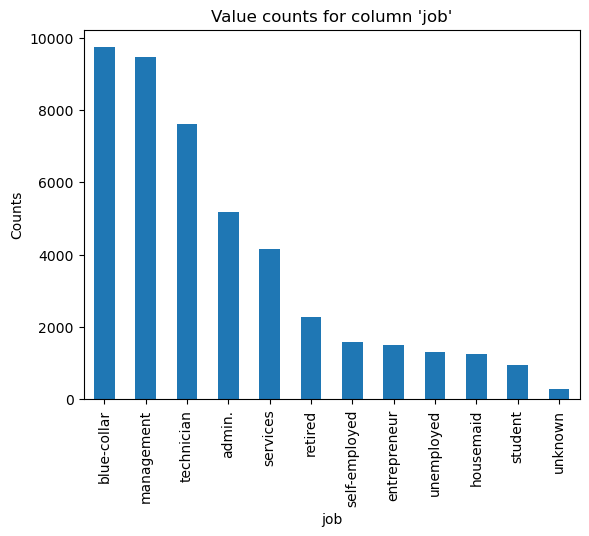

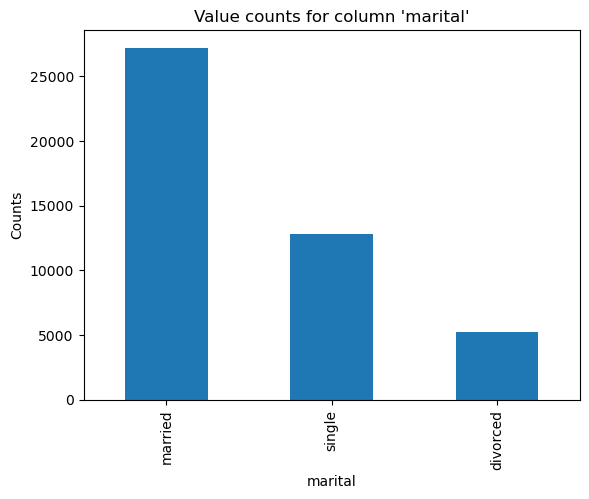

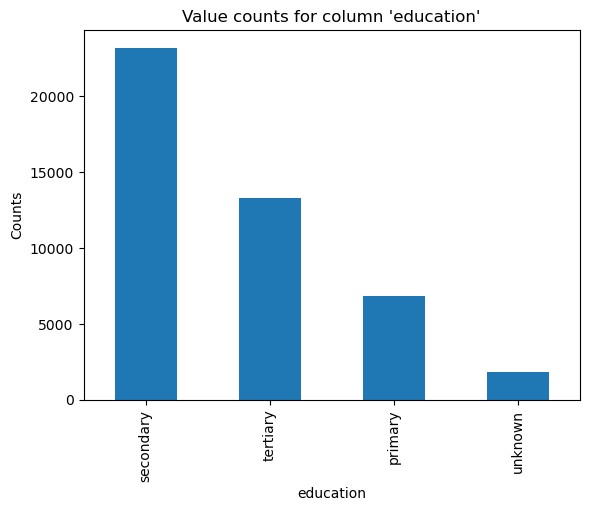

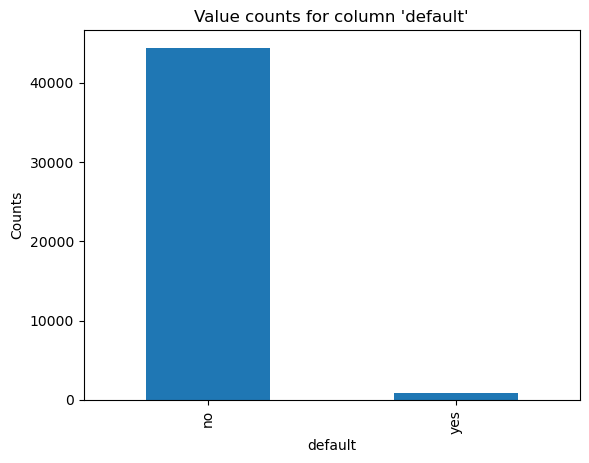

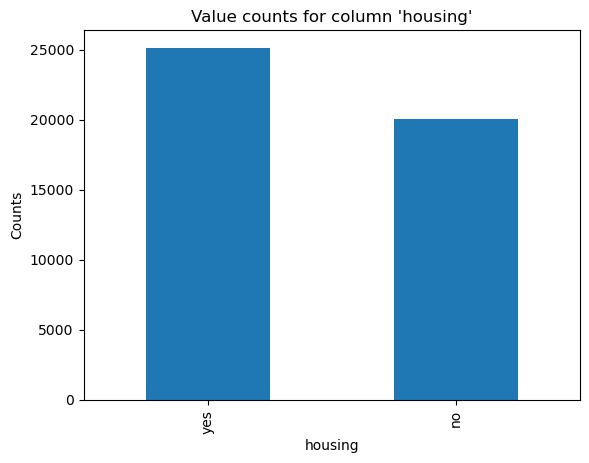

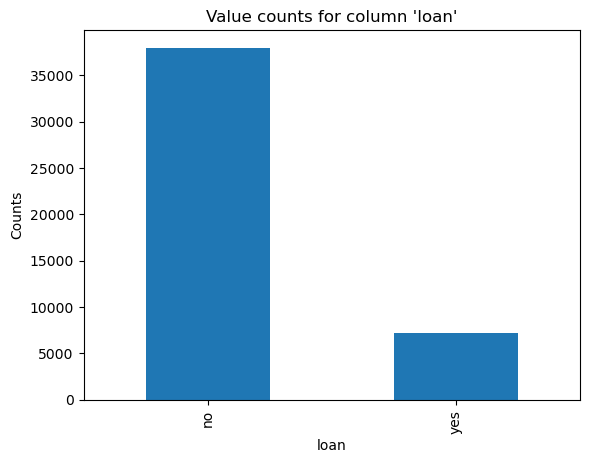

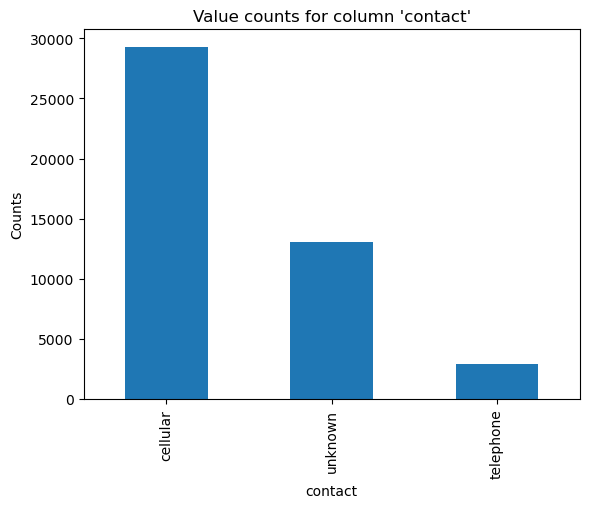

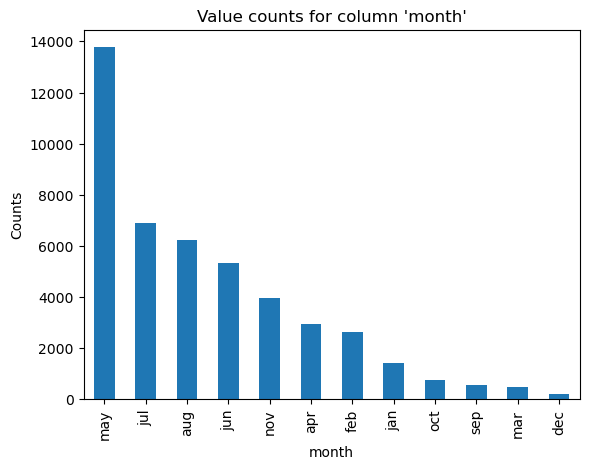

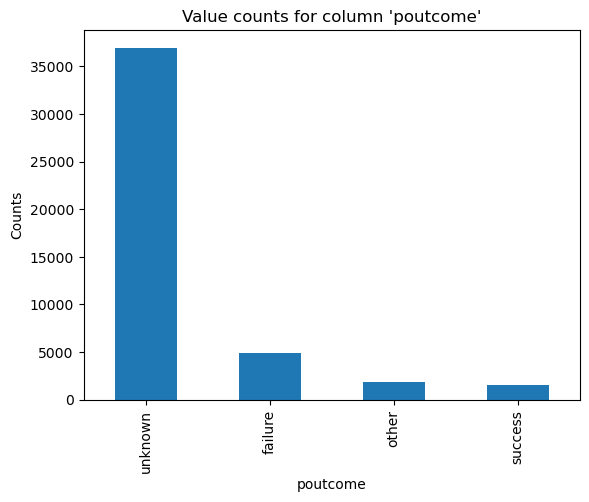

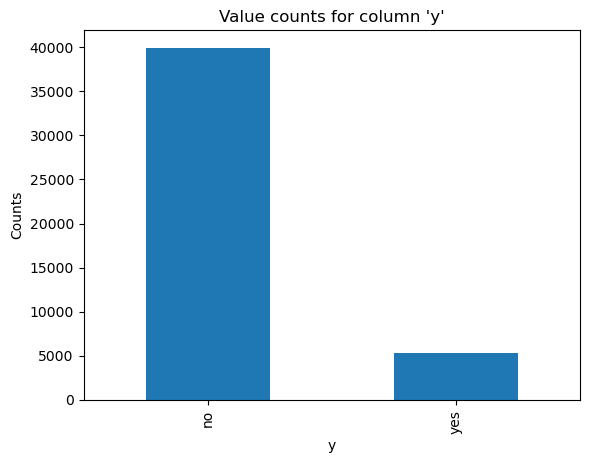

In [386]:
# Select only columns of type 'object'
object_columns = df.select_dtypes(include=['object'])

# Plot value_counts for each object column
for column in object_columns:
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', title=f"Value counts for column '{column}'")
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.show()

In [387]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Plots of data

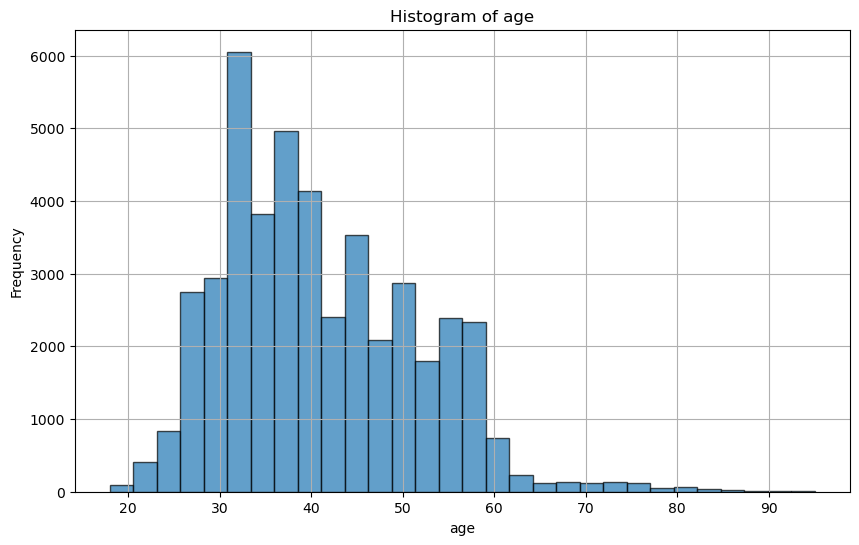

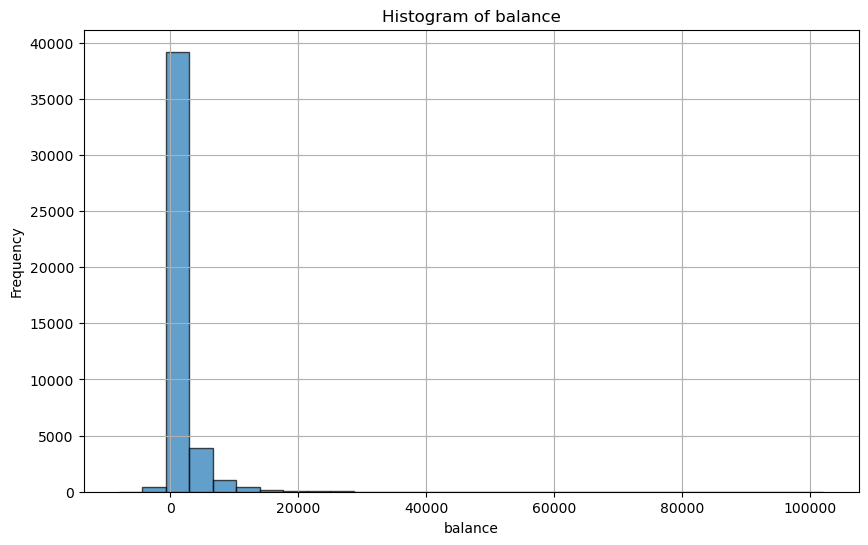

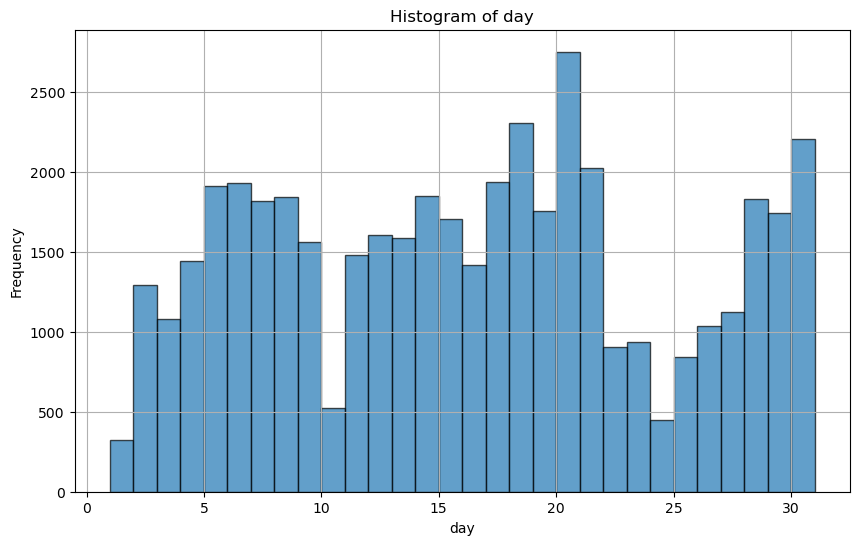

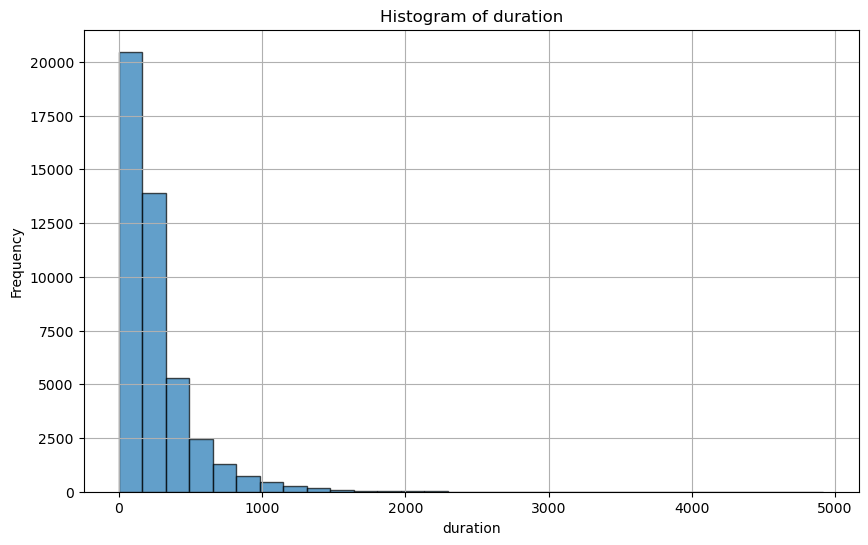

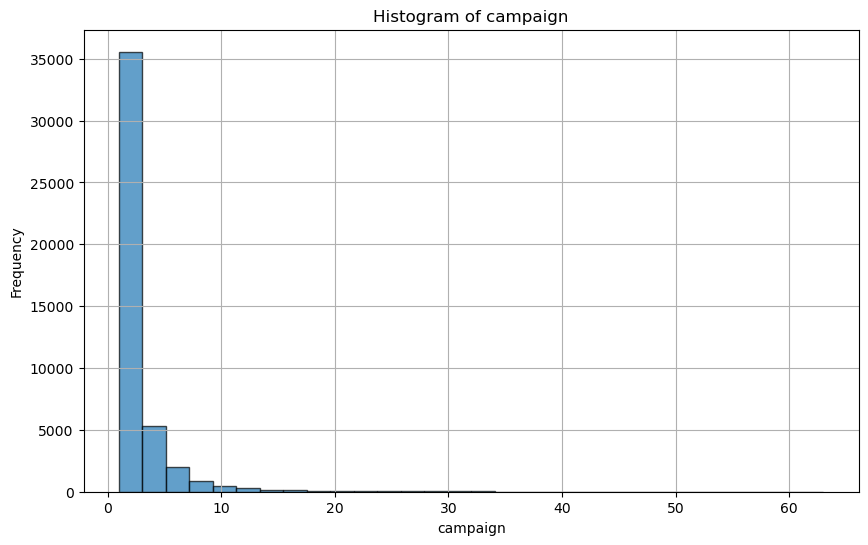

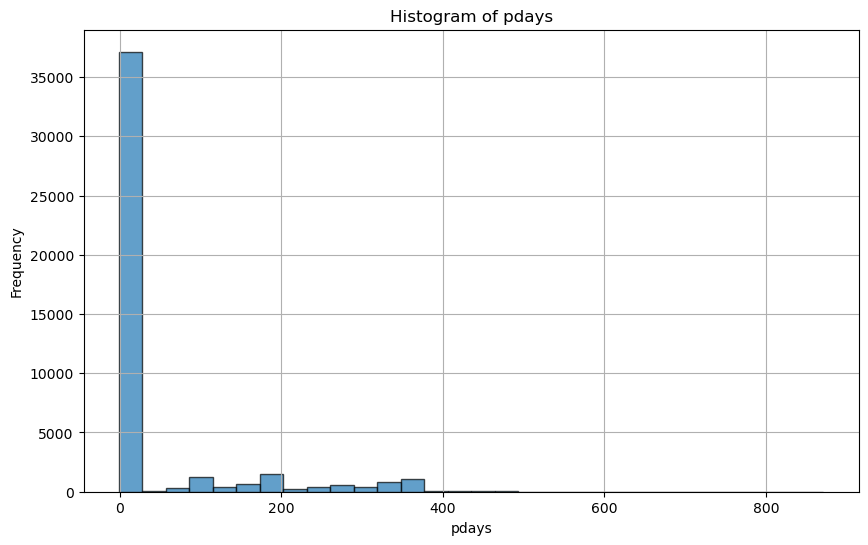

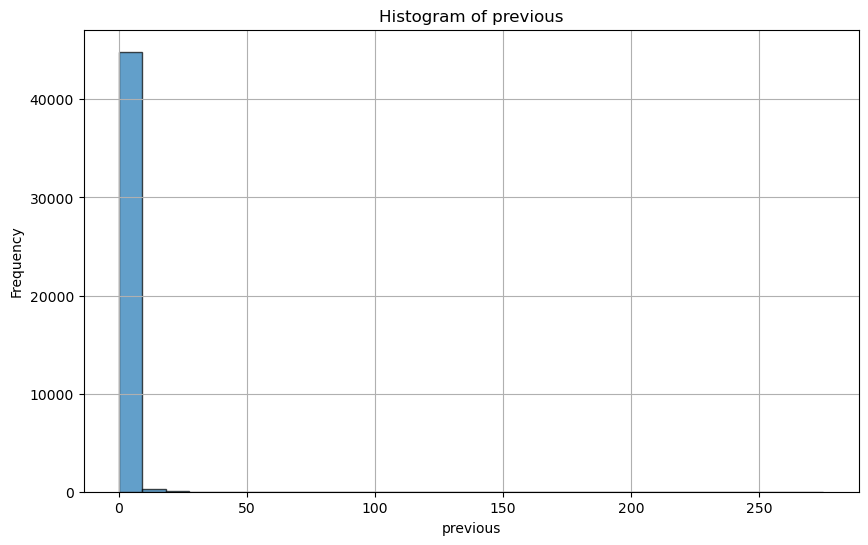

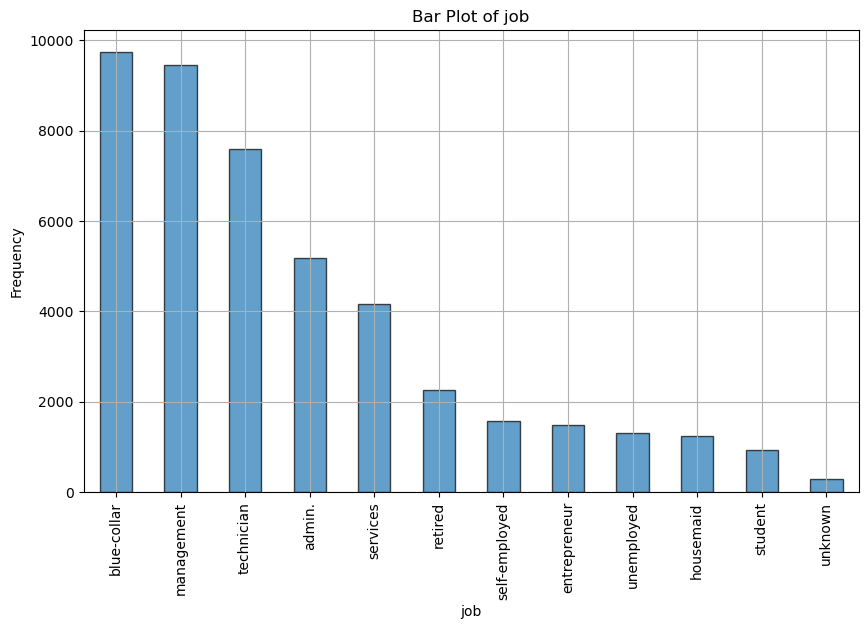

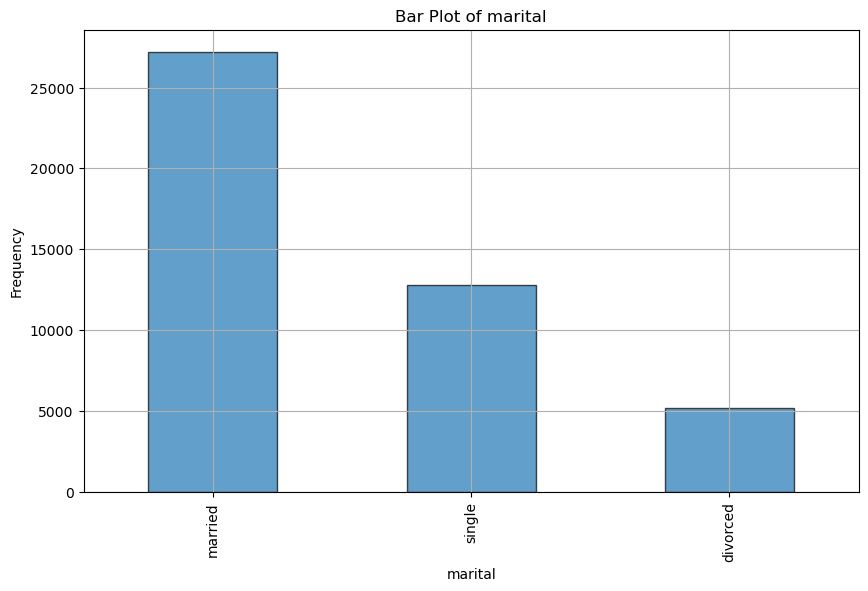

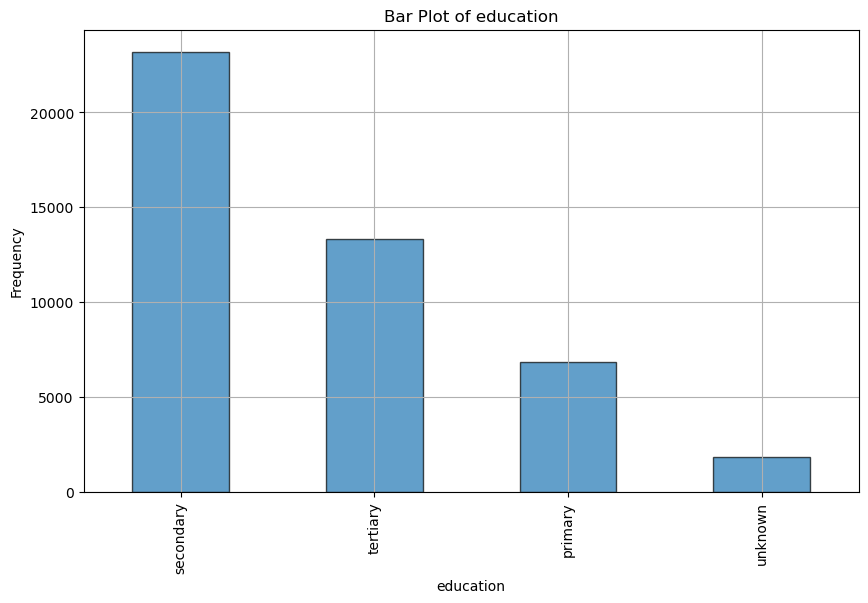

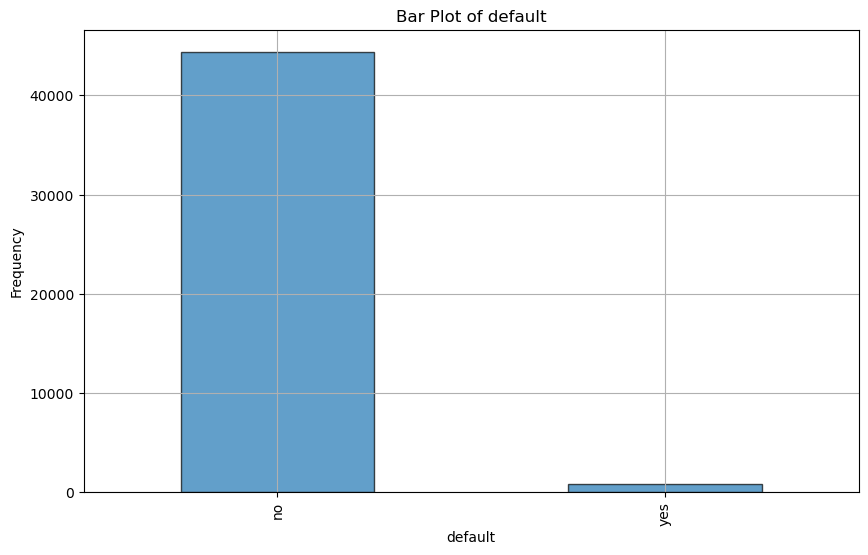

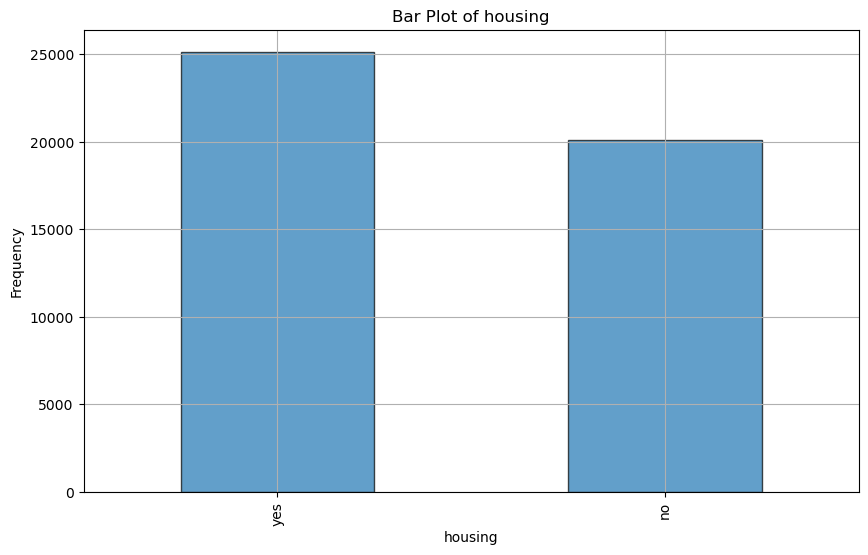

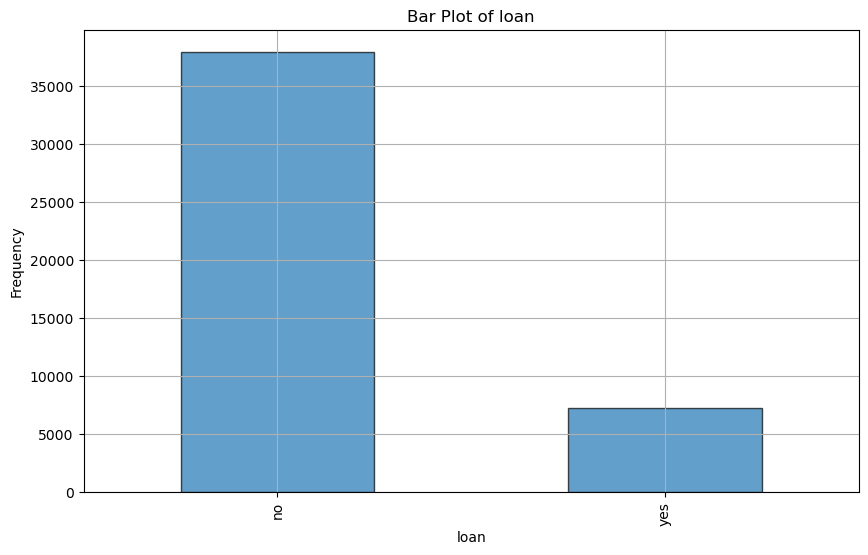

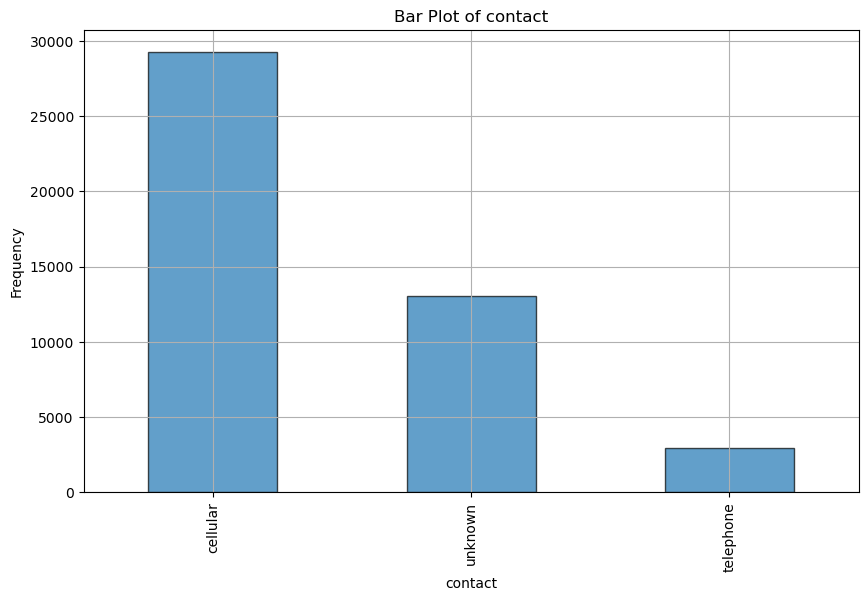

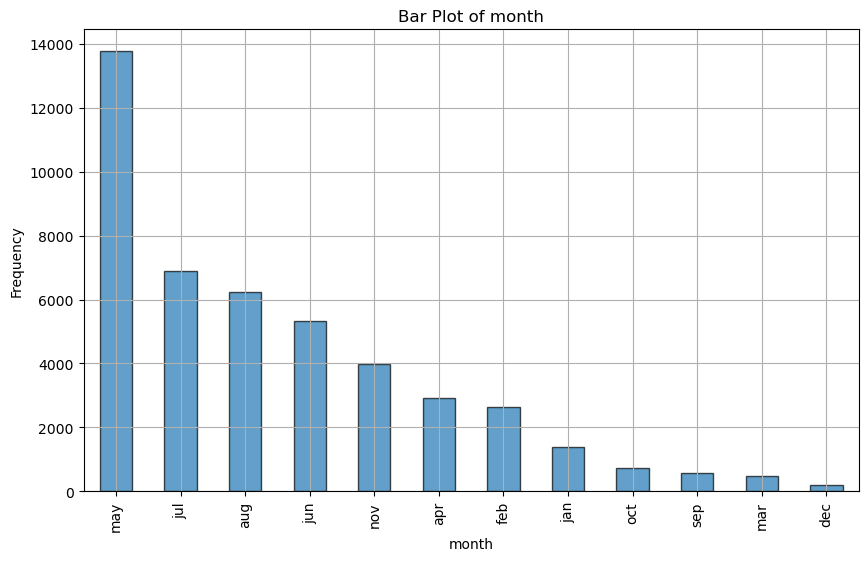

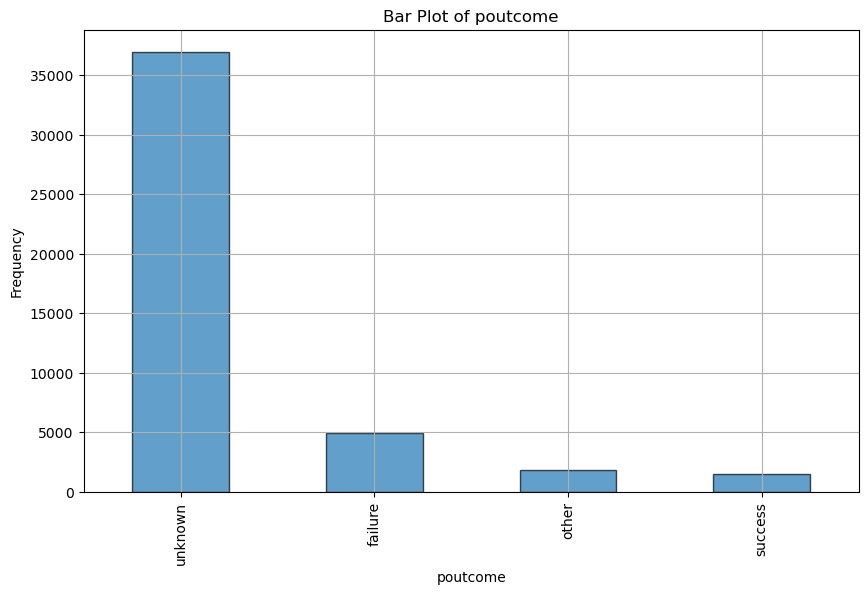

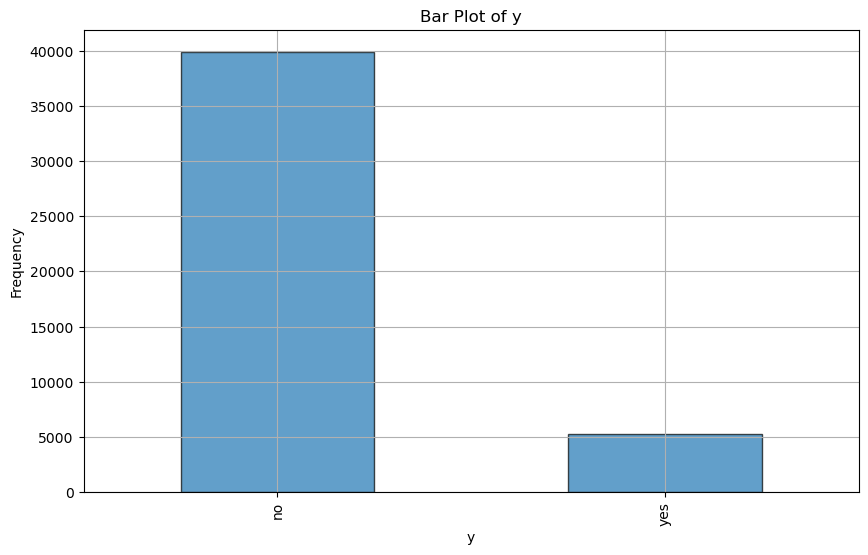

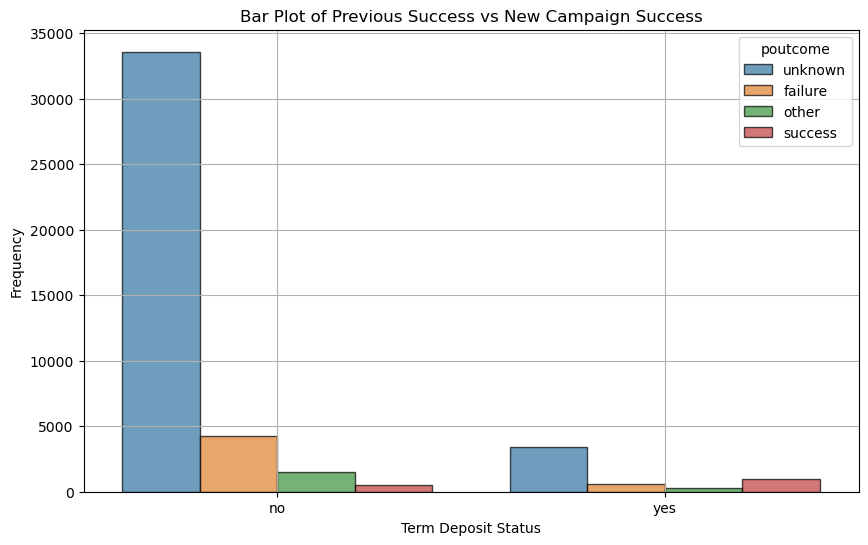

In [390]:
# List of columns to create histograms for
columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create histograms for numerical columns
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# For categorical columns, use bar plots
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot with hue
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='y', hue='poutcome', edgecolor='k', alpha=0.7)
plt.title('Bar Plot of Previous Success vs New Campaign Success')
plt.xlabel('Term Deposit Status')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Plots filtered down IQR

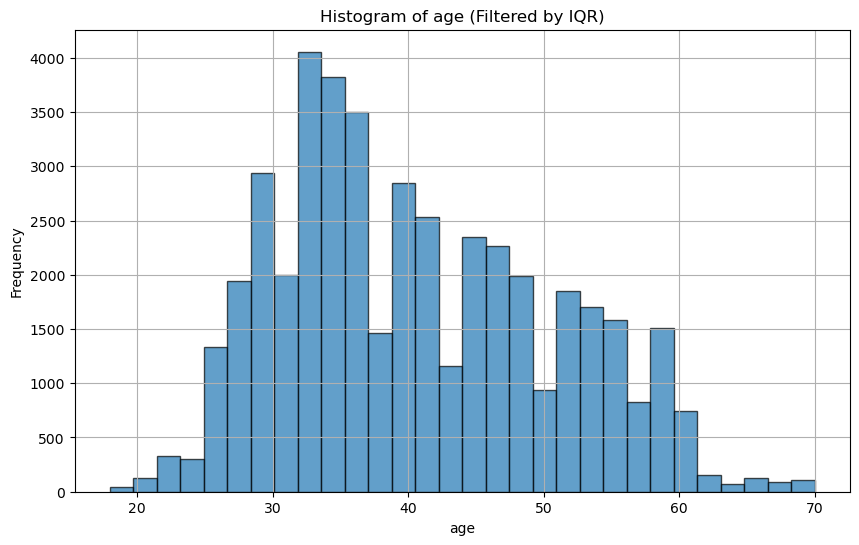

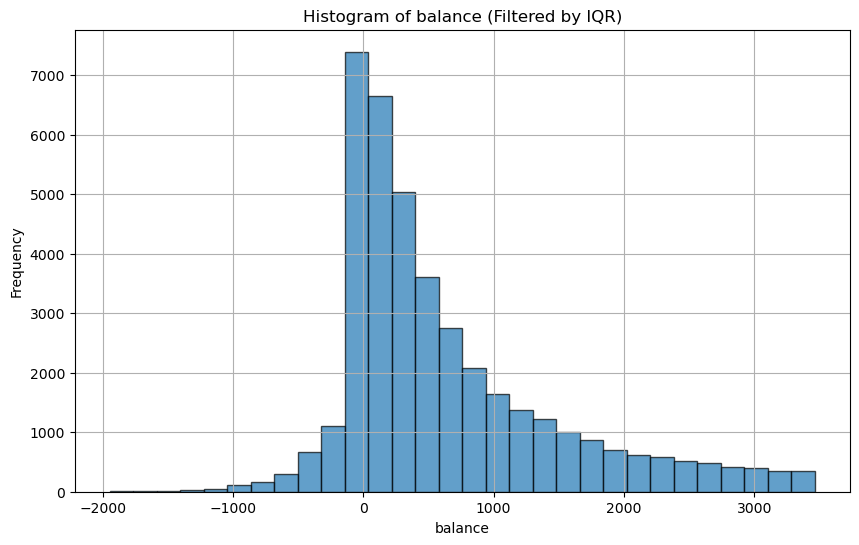

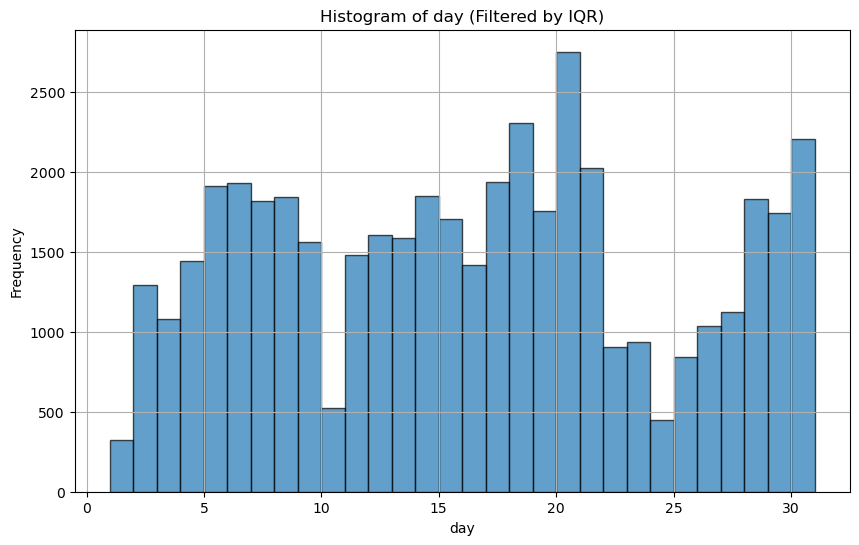

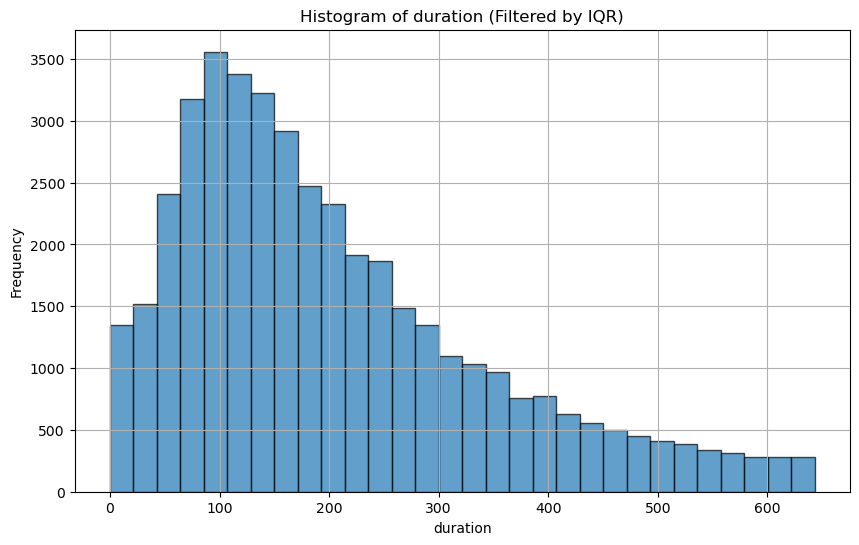

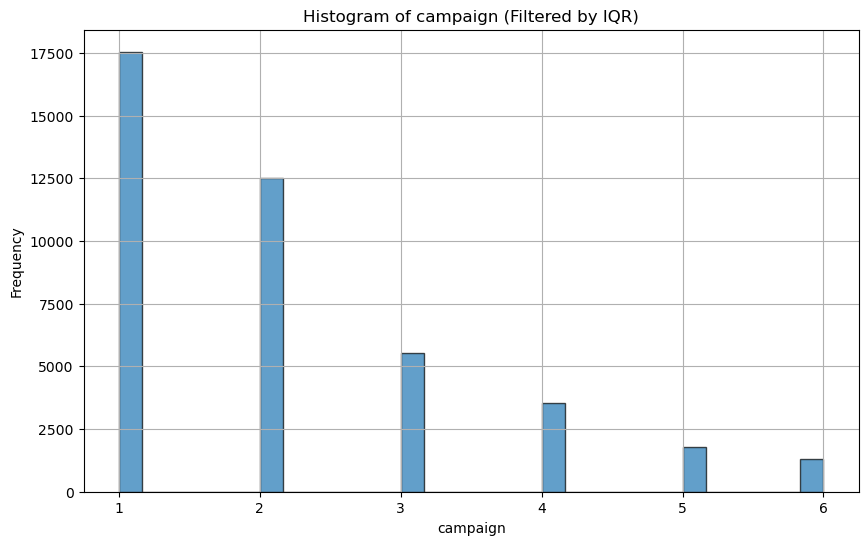

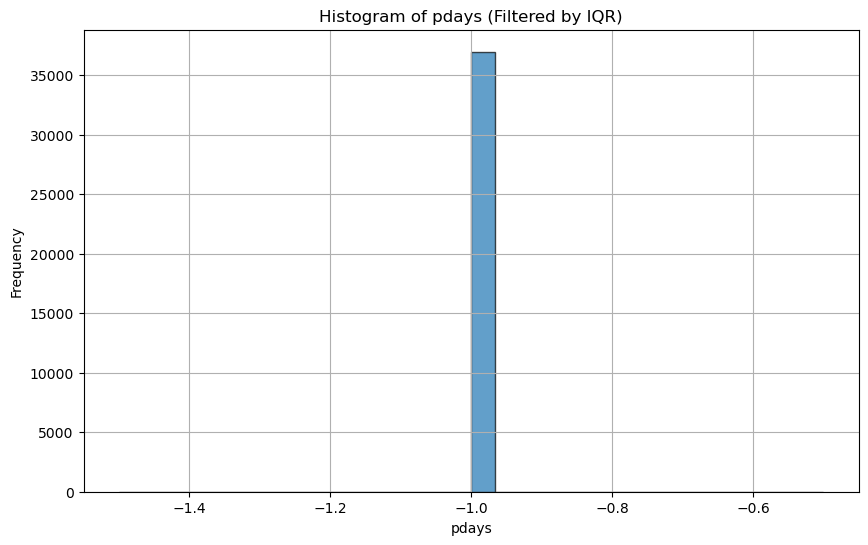

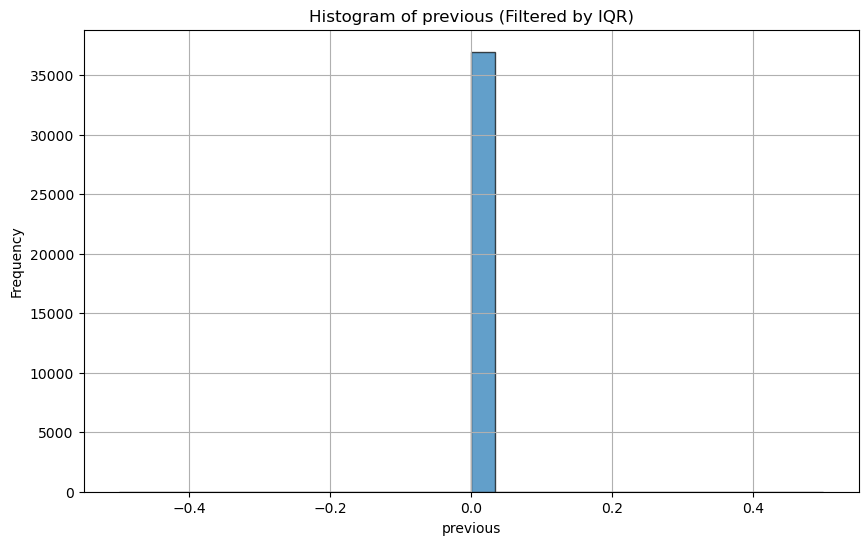

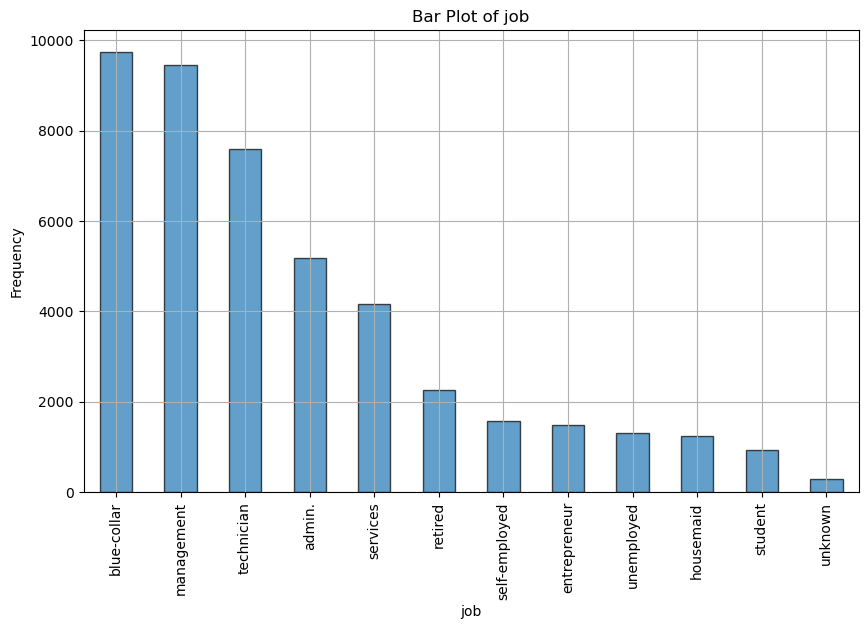

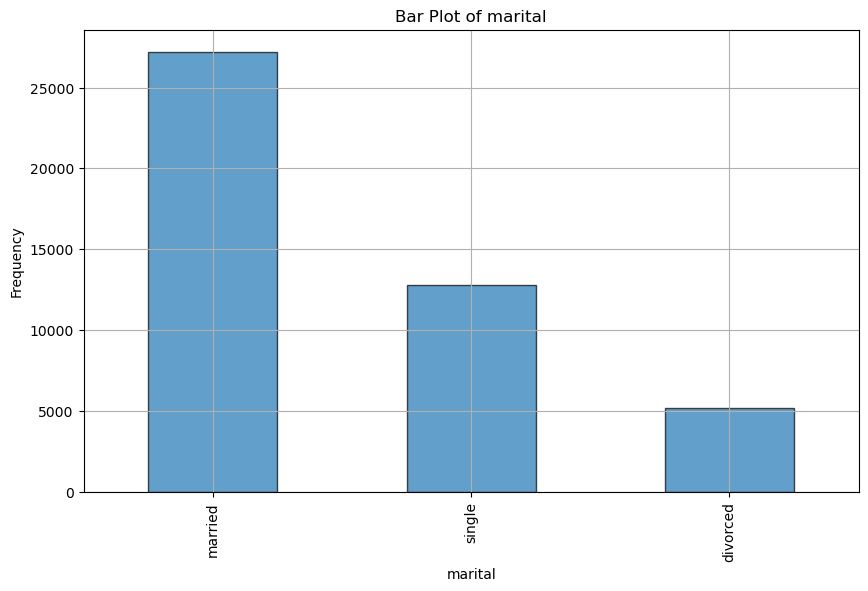

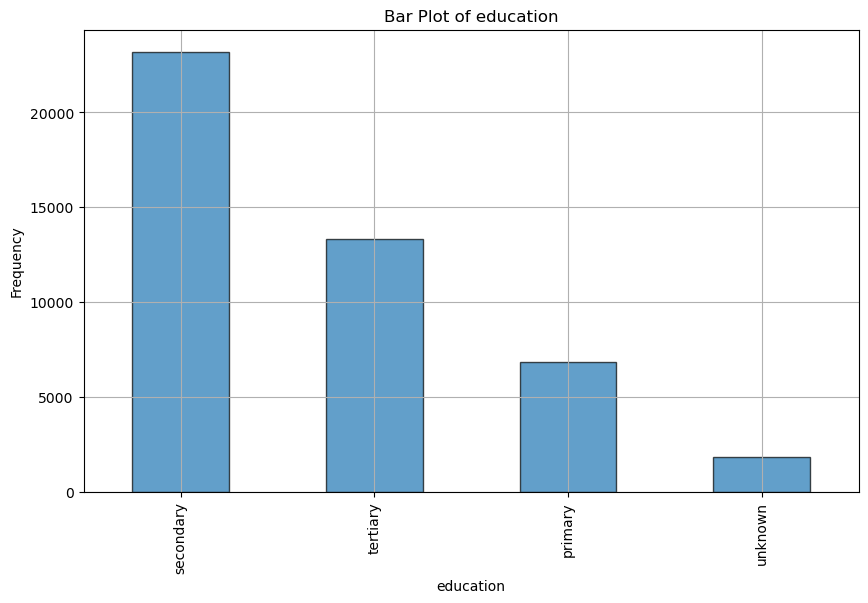

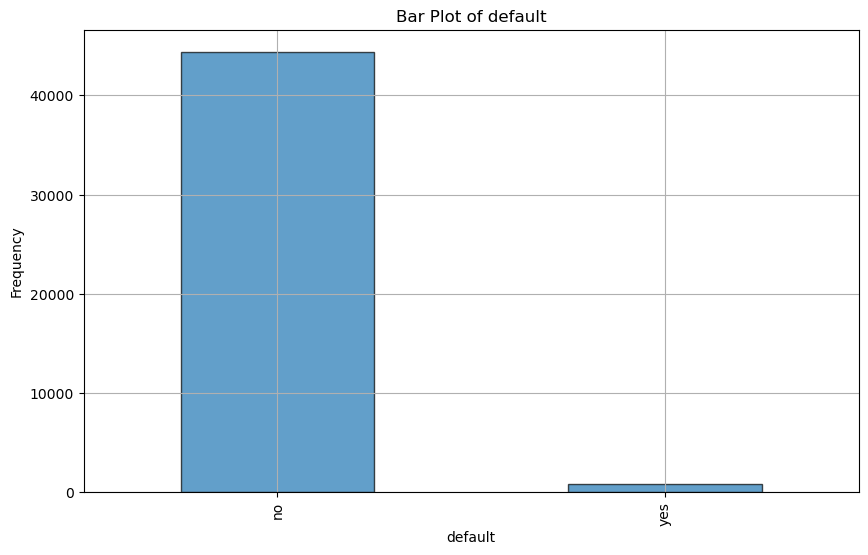

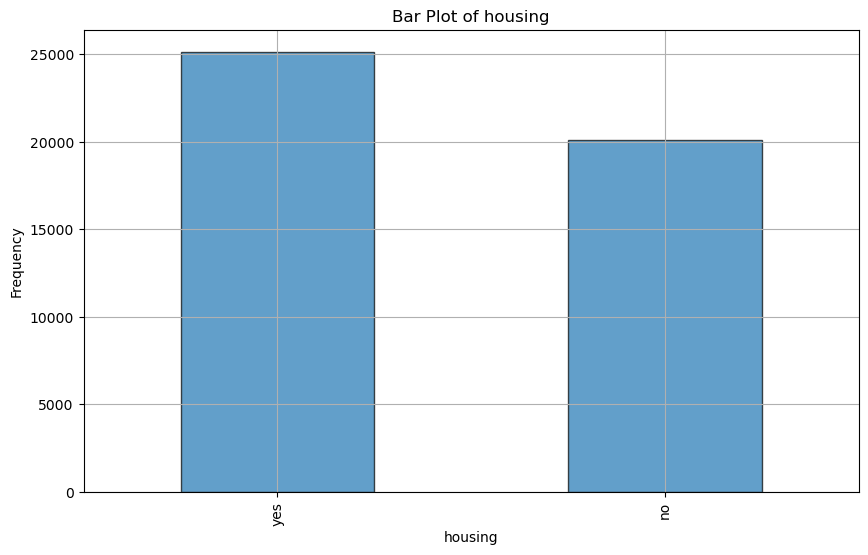

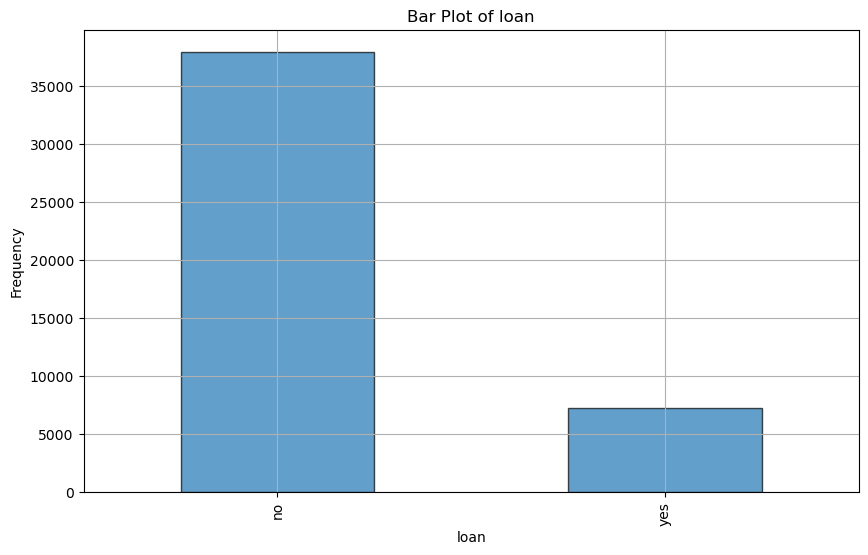

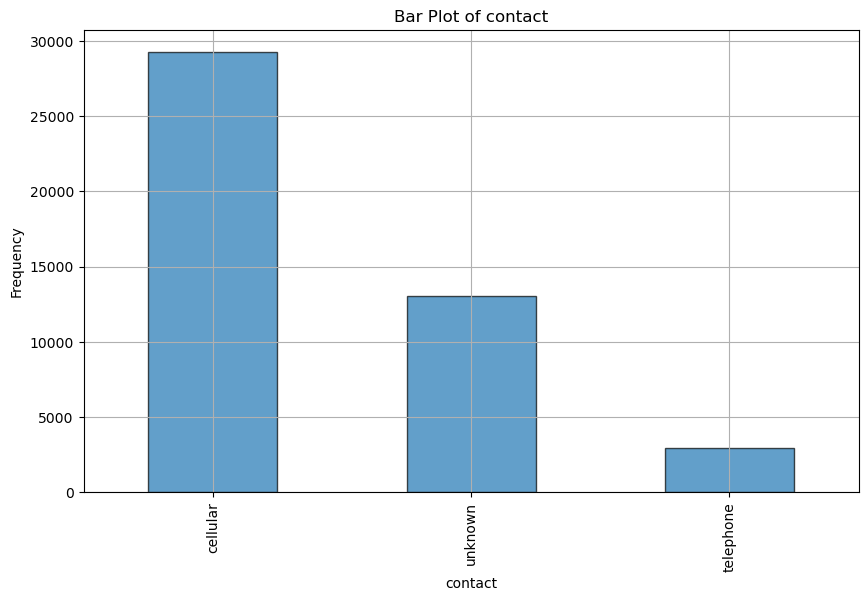

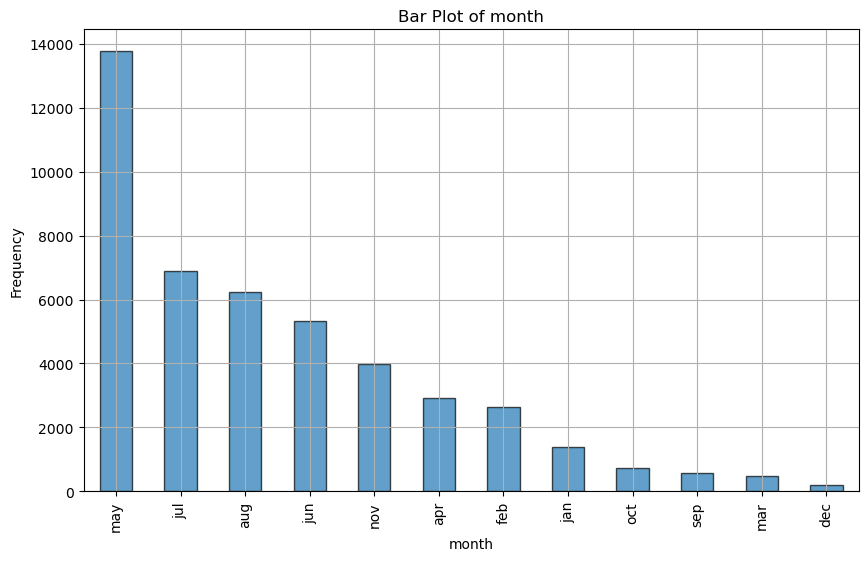

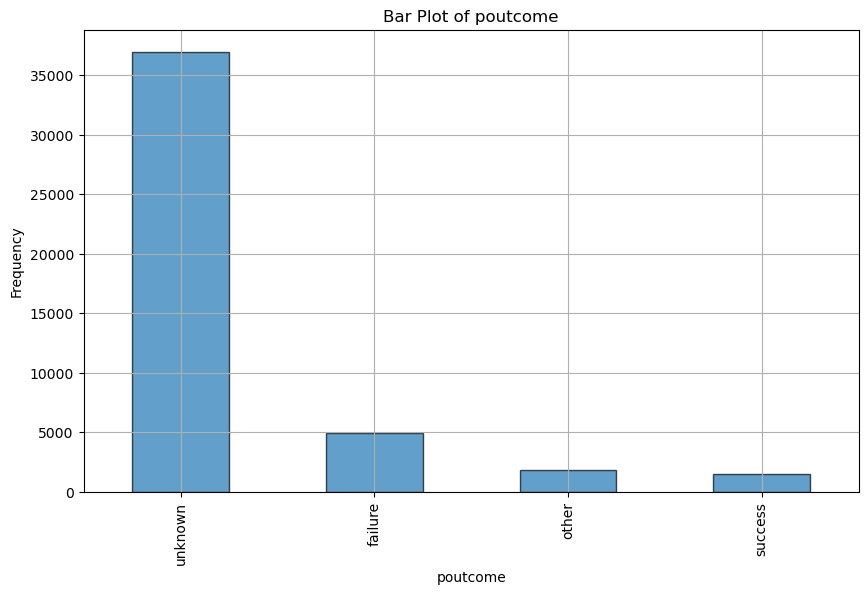

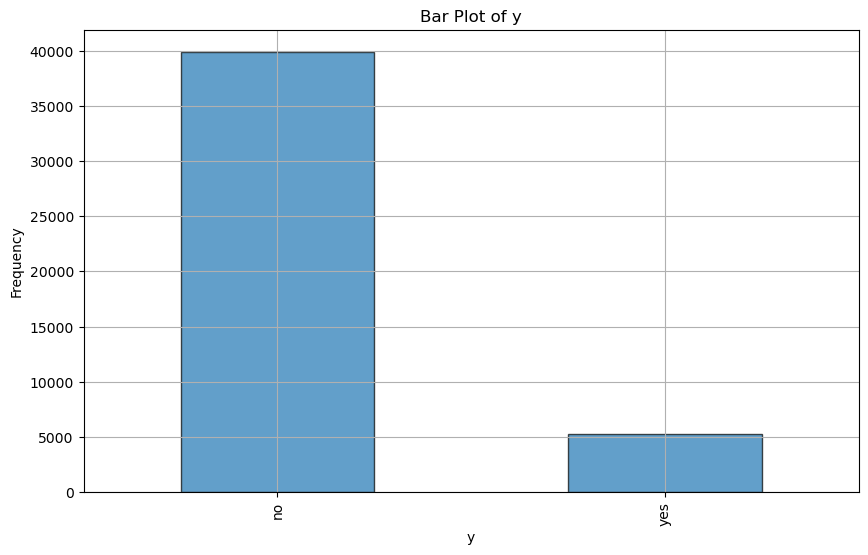

In [392]:

numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Function to calculate IQR and filter data
def filter_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    filtered_data = data[(data[column] >= (Q1 - 1.5 * IQR)) & (data[column] <= (Q3 + 1.5 * IQR))]
    return filtered_data

# Create histograms for numerical columns using IQR
for column in numerical_columns:
    filtered_df = filter_iqr(df, column)
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column} (Filtered by IQR)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Create bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



In [393]:
# #Remove things outside of the IQR in the data set

# # Apply IQR to numeric columns
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# for col in numeric_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # Remove any null rows
# df = df.dropna()

# # Display the cleaned DataFrame
# print(df)


In [394]:
# Month is biased towards a single month
df = df.drop('month', axis=1)

## One Hot Encoding + Standard Scaler

In [396]:

def prepare_dataframe(df):
    # Separate the target variable
    y = df['y']
    X = df.drop('y', axis=1)

    # Convert categorical variables to numeric using one-hot encoding
    X = pd.get_dummies(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features to have mean=0 and variance=1
    sc = StandardScaler()
    X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = prepare_dataframe(df)

# KNN

In [398]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the grid of hyperparameters 'params'
params = {
    'n_neighbors': list(range(1, 31))
}

# Perform grid search
grid_search = GridSearchCV(estimator=knn, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Get the optimal hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the classifier with the optimal hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
knn.fit(X_train, y_train)

#average fit time
cv_results = cross_validate(knn, X_train, y_train, cv=5, return_train_score=False)
avg_fit_time = np.mean(cv_results['fit_time'])
print(f'Average fit time for KNN: {avg_fit_time} seconds')

# Make predictions on the train and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate the train and test scores
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

# Print the train score, test score, and optimal hyperparameters
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Optimal hyperparameters: {best_params}")


Average fit time for KNN: 0.027573108673095703 seconds
Train score: 0.8966766202167662
Test score: 0.8935087913303107
Optimal hyperparameters: {'n_neighbors': 30}


In [399]:
# Feature importance using permutation
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
original = X_test_np.copy()
perturbed = X_test_np.copy()

importances = []

for i in range(X_test_np.shape[1]):
    perturbed[:, i] = np.random.permutation(perturbed[:, i])
    importance = ((knn.predict(original) == y_test) != (knn.predict(perturbed) == y_test)).mean()
    importances.append(importance)
    perturbed[:, i] = original[:, i]  # Restore original feature

# Print feature importances with feature names
feature_names = X_test.columns if isinstance(X_test, pd.DataFrame) else [f"Feature {i}" for i in range(X_test_np.shape[1])]
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance}")


C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  

age: 0.0057503041026208115
balance: 0.0030963175937188986
day: 0.00641380072984629
duration: 0.016697998451841202
campaign: 0.0027645692801061593
pdays: 0.0027645692801061593
previous: 0.0018799071104721884
job_admin.: 0.002101072652880681
job_blue-collar: 0.0018799071104721884
job_entrepreneur: 0.0011058277120424638
job_housemaid: 0.0005529138560212319
job_management: 0.0033174831361273915
job_retired: 0.0017693243392679422
job_self-employed: 0.0006634966272254782
job_services: 0.0011058277120424638
job_student: 0.0009952449408382174
job_technician: 0.002985734822514652
job_unemployed: 0.0007740793984297247
job_unknown: 0.0003317483136127391
marital_divorced: 0.002101072652880681
marital_married: 0.0033174831361273915
marital_single: 0.003206900364923145
education_primary: 0.0015481587968594493
education_secondary: 0.0036492314497401303
education_tertiary: 0.004644476390578348
education_unknown: 0.0013269932544509565
default_no: 0.0
default_yes: 0.0
housing_no: 0.0035386486785358843
h

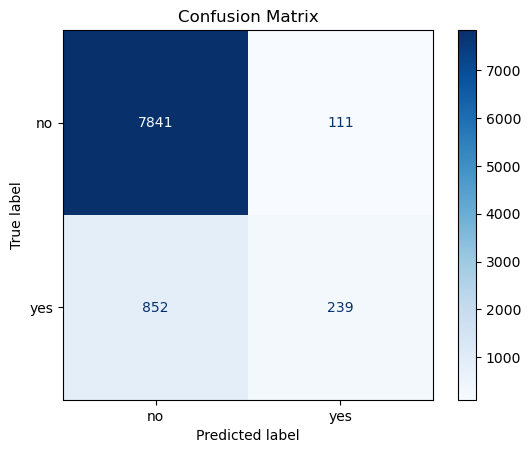

In [400]:
# Confusion Matrix:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [401]:
#Classification report
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.68      0.22      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.60      0.64      9043
weighted avg       0.88      0.89      0.87      9043



In [402]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print(cv_scores)


[0.89245231 0.89922588 0.89383467 0.89492603 0.89340523]


# SVC

In [404]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a SVC classifier with class weights
svc = SVC(class_weight={'no': 1, 'yes': 3})  # Adjust the weight for 'yes' class

# Define the grid of hyperparameters 'params'
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Perform grid search
grid_search = GridSearchCV(estimator=svc, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Get the optimal hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the classifier with the optimal hyperparameters
svc = SVC(kernel=best_params['kernel'])
svc.fit(X_train, y_train)

#average fit time
cv_results = cross_validate(svc, X_train, y_train, cv=5, return_train_score=False)
avg_fit_time = np.mean(cv_results['fit_time'])
print(f'Average fit time for SVC: {avg_fit_time} seconds')

# Make predictions on the train and test sets
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

# Calculate the train and test scores
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

# Print the train score, test score, and optimal hyperparameters
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Optimal hyperparameters: {best_params}")


Average fit time for SVC: 18.945181703567506 seconds
Train score: 0.8933864189338642
Test score: 0.8907442220502045
Optimal hyperparameters: {'kernel': 'linear'}


In [405]:
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[7853   99]
 [ 889  202]]


In [406]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.67      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



In [407]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)
print(cv_scores)


[0.89120818 0.89839646 0.89328173 0.89285221 0.89119314]


In [408]:
# Get feature importance
feature_importance = svc.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by ascending value
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
print(feature_importance_df)



                Feature    Importance
38     poutcome_unknown -7.871395e-02
35     poutcome_failure -6.316347e-02
36       poutcome_other -4.054601e-02
31             loan_yes -2.140982e-05
5                 pdays -1.914171e-05
34      contact_unknown -1.698405e-05
10        job_housemaid -1.656873e-05
15          job_student -1.589446e-05
16       job_technician -1.288763e-05
23  education_secondary -1.175118e-05
27          default_yes -1.090868e-05
19     marital_divorced -9.334410e-06
1               balance -7.612906e-06
6              previous -7.211908e-06
8       job_blue-collar -5.763816e-06
29          housing_yes -4.229026e-06
18          job_unknown -3.908633e-06
25    education_unknown -3.731872e-06
20      marital_married -1.115247e-06
22    education_primary  5.779039e-07
4              campaign  1.311538e-06
0                   age  2.107483e-06
17       job_unemployed  2.405477e-06
14         job_services  2.883902e-06
9      job_entrepreneur  3.313617e-06
28          

# Logistic Regression

In [410]:
# Create a logistic regression classifier
log_reg = LogisticRegression()

# Define the grid of hyperparameters 'params'
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Get the optimal hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the classifier with the optimal hyperparameters
log_reg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'])
log_reg.fit(X_train, y_train)

#fit time
cv_results = cross_validate(log_reg, X_train, y_train, cv=5, return_train_score=False)
avg_fit_time = np.mean(cv_results['fit_time'])
print(f'Average fit time for Logistic Regression: {avg_fit_time} seconds')

# Make predictions on the train and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate the train and test scores
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

# Print the train score, test score, and optimal hyperparameters
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Optimal hyperparameters: {best_params}")


C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\scallred\AppData

Average fit time for Logistic Regression: 0.08953719139099121 seconds
Train score: 0.9012386640123866
Test score: 0.8976003538648678
Optimal hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [411]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7759  193]
 [ 733  358]]


In [412]:
#Classification report
from sklearn.metrics import classification_report
y_pred = log_reg.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7952
         yes       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [413]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print(cv_scores)


[0.89894941 0.90143766 0.90254354 0.90142403 0.90294484]


In [414]:
import numpy as np

importances = []
for i in range(X_train.shape[1]):
    original = X_test.copy()
    perturbed = X_test.copy()
    perturbed[:, i] = np.random.permutation(perturbed[:, i])
    importance = ((log_reg.predict(original) == y_test) != (log_reg.predict(perturbed) == y_test)).mean()
    importances.append(importance)

# Generate feature names as 'Feature 1', 'Feature 2', etc.
feature_names = [f"Feature {i+1}" for i in range(X_train.shape[1])]

# Combine feature names with their importances
feature_importances = list(zip(feature_names, importances))

# Print feature importances
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")


Feature 1: 0.0011058277120424638
Feature 2: 0.0016587415680636957
Feature 3: 0.0018799071104721884
Feature 4: 0.07409045670684507
Feature 5: 0.007630211213093
Feature 6: 0.00022116554240849277
Feature 7: 0.0005529138560212319
Feature 8: 0.0015481587968594493
Feature 9: 0.0015481587968594493
Feature 10: 0.0008846621696339711
Feature 11: 0.0005529138560212319
Feature 12: 0.0
Feature 13: 0.002985734822514652
Feature 14: 0.00022116554240849277
Feature 15: 0.0003317483136127391
Feature 16: 0.0018799071104721884
Feature 17: 0.0006634966272254782
Feature 18: 0.0
Feature 19: 0.0
Feature 20: 0.00011058277120424638
Feature 21: 0.0030963175937188986
Feature 22: 0.0037598142209443767
Feature 23: 0.002101072652880681
Feature 24: 0.0005529138560212319
Feature 25: 0.0037598142209443767
Feature 26: 0.0
Feature 27: 0.00011058277120424638
Feature 28: 0.0
Feature 29: 0.009288952781156696
Feature 30: 0.008293707840318479
Feature 31: 0.0017693243392679422
Feature 32: 0.002322238195289174
Feature 33: 0.0076

In [415]:
# Larger abs(coefficients) indicate stronger relationships between the feature and the 
coefficients = log_reg.coef_
print(coefficients)

[[ 0.02980092  0.04614503 -0.02908704  1.04552943 -0.32223617  0.01125266
   0.01820696  0.06915246 -0.07023541 -0.0390972  -0.04200576  0.00176753
   0.11149529 -0.01985865 -0.01729507  0.09462278 -0.02153218  0.00188647
  -0.01641562  0.00325028 -0.07172564  0.07564633 -0.0780032  -0.01518767
   0.07873779 -0.00115557  0.01536425 -0.01536425  0.19474972 -0.19474972
   0.10108901 -0.10108901  0.23978969  0.11526156 -0.31541422 -0.04084703
   0.02776672  0.38435888 -0.1603841 ]]


# Decision Tree

In [417]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Define the grid of hyperparameters 'params'
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Get the optimal hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the classifier with the optimal hyperparameters
dt = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])
dt.fit(X_train, y_train)

#fit time
cv_results = cross_validate(dt, X_train, y_train, cv=5, return_train_score=False)
avg_fit_time = np.mean(cv_results['fit_time'])
print(f'Average fit time for Decision Tree: {avg_fit_time} seconds')

# Make predictions on the train and test sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate the train and test scores
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

# Print the train score, test score, and optimal hyperparameters
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Optimal hyperparameters: {best_params}")


Average fit time for Decision Tree: 0.06531963348388672 seconds
Train score: 0.9030911302809113
Test score: 0.8952781156695787
Optimal hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


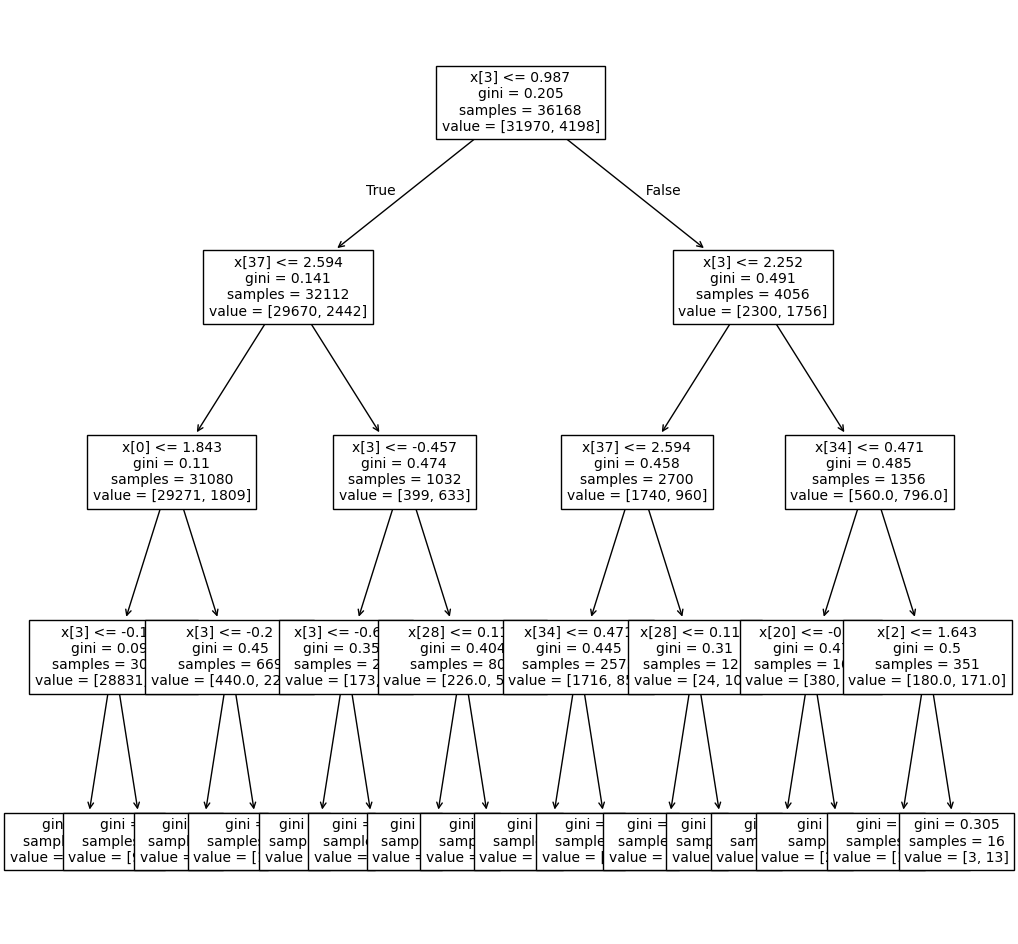

In [418]:

fig, ax = plt.subplots(figsize=(12, 12))  # Change the size as necessary
tree.plot_tree(dt, fontsize=10)  # Change the fontsize as necessary
plt.show()


In [419]:
#Classification report
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7952
         yes       0.62      0.33      0.43      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



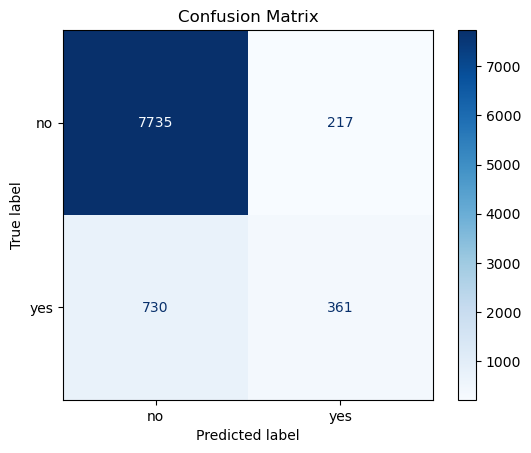

In [420]:
#Confusion Matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [421]:
import pandas as pd

def prepare_dataframe(df):
    # Separate the target variable
    y = df['y']
    X = df.drop('y', axis=1)

    # Convert categorical variables to numeric using one-hot encoding
    X = pd.get_dummies(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features to have mean=0 and variance=1
    sc = StandardScaler()
    X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = prepare_dataframe(df)

importances = dt.feature_importances_

# Create a DataFrame to view feature importances with column names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                Feature  Importance
3              duration    0.593058
37     poutcome_success    0.325491
0                   age    0.053668
34      contact_unknown    0.019100
28           housing_no    0.005011
20      marital_married    0.001947
2                   day    0.001725
35     poutcome_failure    0.000000
36       poutcome_other    0.000000
33    contact_telephone    0.000000
32     contact_cellular    0.000000
21       marital_single    0.000000
30              loan_no    0.000000
29          housing_yes    0.000000
27          default_yes    0.000000
26           default_no    0.000000
25    education_unknown    0.000000
24   education_tertiary    0.000000
23  education_secondary    0.000000
22    education_primary    0.000000
31             loan_yes    0.000000
19     marital_divorced    0.000000
1               balance    0.000000
10        job_housemaid    0.000000
4              campaign    0.000000
5                 pdays    0.000000
6              previous    0

In [422]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")



Cross-validation scores: [0.89936411 0.90143766 0.90088471 0.90170054 0.90377437]
Mean cross-validation score: 0.9014322774372872


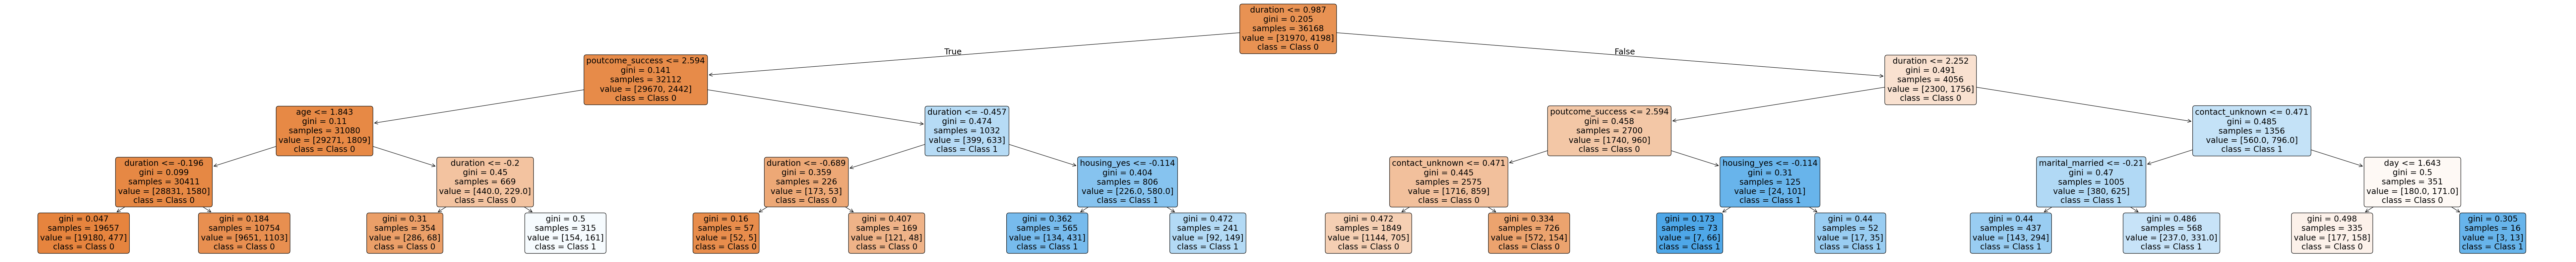

In [423]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import pandas as pd

# Assuming X_train is your training data
X_train = pd.DataFrame(X_train)


# After training the classifier
dt = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])
dt.fit(X_train, y_train)

# Add this code to plot the decision tree
plt.figure(figsize=(100,10))
plot_tree(dt, filled=True, rounded=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.show()
